# Who let 'some' dogs out? 🐾

Final Project: Dog breed detection

A little info:

*   The dataset consist in a folder with 10222 images of dogs and a csv with 120 breeds
*   I got the data from Kaggle but edited it a bit (since there where no dachshunds and dachshunds = 💗)
*   This is a model with only some breeds, the original notebook project with the 120 breeds was made on google colab and it's called 'Who let the dogs out?'

In [1]:
# packages
import tensorflow as tf
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image
from matplotlib.pyplot import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## EDA

In [2]:
# loading & checking data: breeds
dogbreeds = pd.read_csv('dog-breeds/labelsbreeds.csv')
dogbreeds

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
dogbreeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [4]:
dogbreeds['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

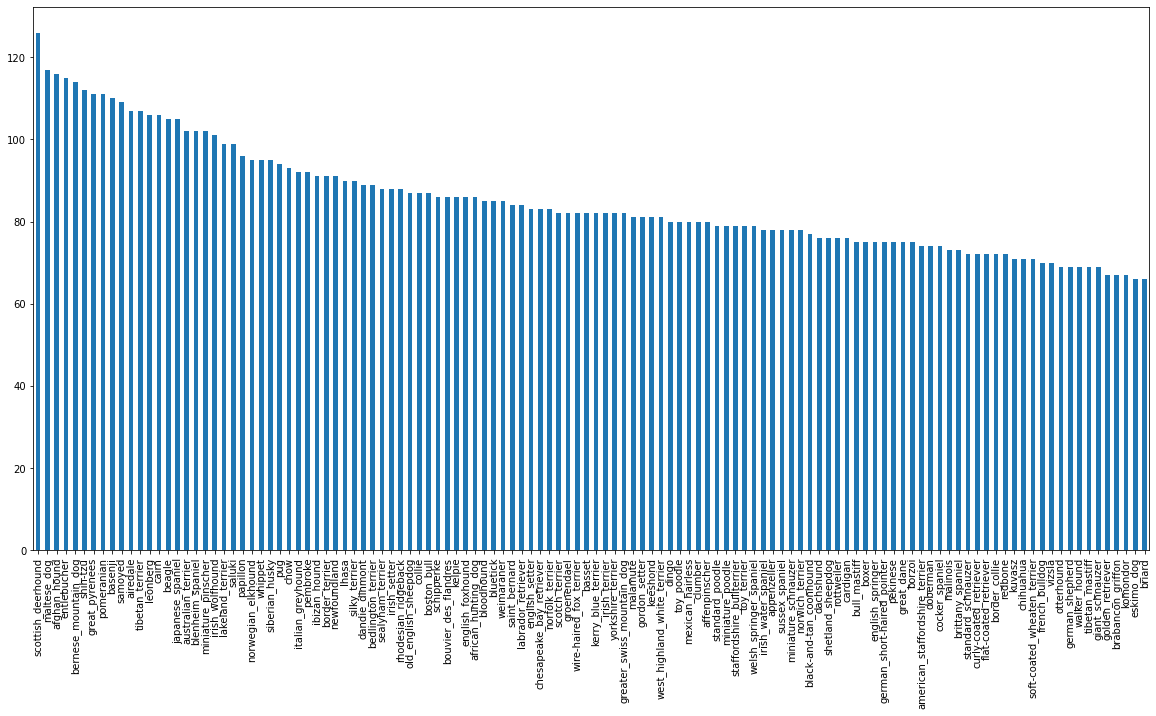

In [5]:
dogbreeds['breed'].value_counts().plot.bar(figsize=(20, 10));

In [6]:
# checking the breeds
dogbreeds['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dachshund', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'b

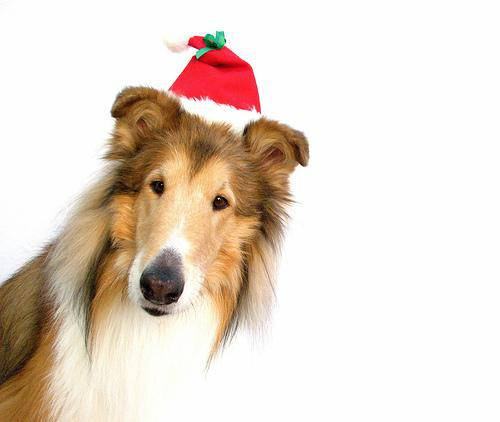

In [7]:
# naming the picture folders
train_images = 'dog-breeds/trainbreeds/'
test_images = 'dog-breeds/test/'
# checking a random picture
Image('dog-breeds/trainbreeds/0a6c192b96e55e2ca37318919b1ffae6.jpg')

In [8]:
# get the image path in the csv file
dogs = dogbreeds.assign(image_path = lambda x: train_images + x['id'] + '.jpg')
dogs

,id,breed,image_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,dog-breeds/trainbreeds/000bec180eb18c7604dcecc...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,dog-breeds/trainbreeds/001513dfcb2ffafc82cccf4...
2,001cdf01b096e06d78e9e5112d419397,pekinese,dog-breeds/trainbreeds/001cdf01b096e06d78e9e51...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,dog-breeds/trainbreeds/00214f311d5d2247d5dfe4f...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,dog-breeds/trainbreeds/0021f9ceb3235effd7fcde7...
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,dog-breeds/trainbreeds/ffd25009d635cfd16e79350...
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,dog-breeds/trainbreeds/ffd3f636f7f379c51ba3648...
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,dog-breeds/trainbreeds/ffe2ca6c940cddfee68fa3c...
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,dog-breeds/trainbreeds/ffe5f6d8e2bff356e9482a8...


In [9]:
# got to make sure I don't have any nulls there
dogs.isna().sum()

id            0
breed         0
image_path    0
dtype: int64

In [10]:
# checking if it works, if I call the id of the picture before I shold get a... border collie
dogs.loc[dogs['id'] == '0a6c192b96e55e2ca37318919b1ffae6']

,id,breed,image_path
434,0a6c192b96e55e2ca37318919b1ffae6,collie,dog-breeds/trainbreeds/0a6c192b96e55e2ca373189...


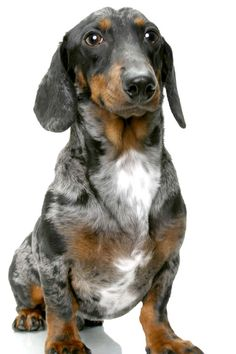

In [11]:
# checking one more because: dogs
Image(dogs['image_path'][42])

In [12]:
dogs['breed'][42]

'dachshund'

In [13]:
# going to work with only 10 selected breeds. The selection is based on breeds I know and look quite different
# so i can visually check if it works
# copying the playlist just in case
somedogs = dogs.copy()

In [14]:
somedogs = somedogs.loc[somedogs['breed'].isin(['dachshund','golden_retriever', 
                                           'chow', 'siberian_husky', 
                                           'great_dane', 'french_bulldog', 
                                           'rottweiler', 'cocker_spaniel', 
                                           'pekinese', 'doberman'])]
somedogs.reset_index(drop=True, inplace=True)
somedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          775 non-null    object
 1   breed       775 non-null    object
 2   image_path  775 non-null    object
dtypes: object(3)
memory usage: 18.3+ KB


In [15]:
somedogs['breed'].value_counts()

siberian_husky      95
chow                93
dachshund           76
rottweiler          76
pekinese            75
great_dane          75
doberman            74
cocker_spaniel      74
french_bulldog      70
golden_retriever    67
Name: breed, dtype: int64

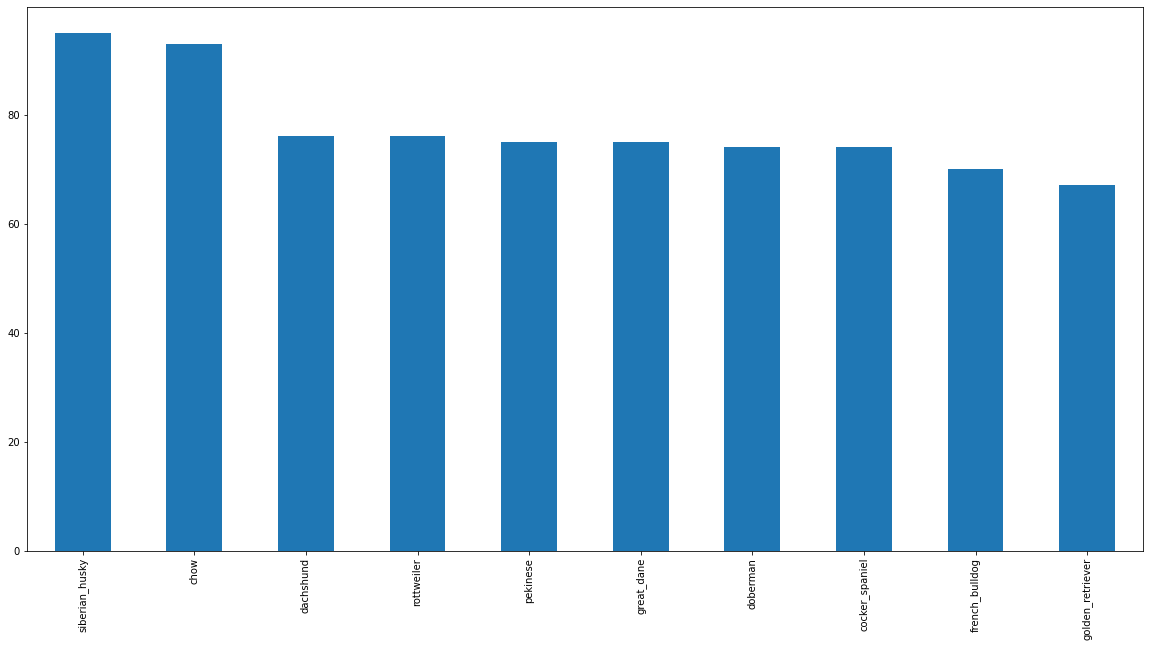

In [16]:
somedogs['breed'].value_counts().plot.bar(figsize=(20, 10));

In [17]:
# surprisingly the amount of pictures is quite balanced, hope this works
# Turn a single label into an array of booleans
unique_breeds = np.unique(somedogs['breed'])
len(unique_breeds)
print(somedogs['breed'][0])
somedogs['breed'][0] == unique_breeds

pekinese


array([False, False, False, False, False, False, False,  True, False,
       False])

In [18]:
boolean_breeds = [breed == unique_breeds for breed in somedogs['breed']]
boolean_breeds[:2]

[array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False])]

In [19]:
print(somedogs['breed'][5])
boolean_breeds[5].astype(int)

dachshund


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
unique_breeds

array(['chow', 'cocker_spaniel', 'dachshund', 'doberman',
       'french_bulldog', 'golden_retriever', 'great_dane', 'pekinese',
       'rottweiler', 'siberian_husky'], dtype=object)

In [21]:
# Setup X & y variables
X = somedogs['image_path']
y = boolean_breeds

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(620, 620, 155, 155)

In [23]:
# Convert image to NumPy array
image = imread(somedogs['image_path'][42])
image.shape

(374, 500, 3)

In [24]:
# Create a function for preprocessing images
def process_image(image_path, img_size = 224):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size = [img_size, img_size])

  return image

In [25]:
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the assosciated label,
  processes the image and returns a tuple of (image, label).
  '''
  image = process_image(image_path)
  return image, label

In [26]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

2021-12-13 22:20:00.393732: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         ...,
         [5.2711838e-01, 7.4280465e-01, 9.0358901e-01],
         [5.4470211e-01, 7.4078053e-01, 9.3293744e-01],
         [5.3655815e-01, 7.3263657e-01, 9.2479348e-01]],
 
        [[9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         ...,
         [5.3760368e-01, 7.5329000e-01, 9.1407430e-01],
         [5.4450279e-01, 7.4842435e-01, 9.3665969e-01],
         [5.3574926e-01, 7.3967081e-01, 9.2790616e-01]],
 
        [[9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         [9.9607849e-01, 9.9607849e-01, 9.9607849e-01],
         ...,
         [5.4774165e-01, 7.6342797e-01, 9.2421228e-01],


In [27]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y = None, batch_size = 32, valid_data = False, test_data = False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print('Creating test data batches ...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(32)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('Creating validation data batches ...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filenames
                                                tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(32)
    return data_batch

  # Train dataset
  else:
    print('Creating train data batches ...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(32)

  return data_batch

In [28]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val) #valid_data=True)

Creating train data batches ...
Creating train data batches ...


In [29]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.bool, name=None)))

In [30]:
# Create a function for viewing images in a data batch
def show_9_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize = (10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(9):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(3, 3, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [31]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.bool)>

2021-12-13 22:20:00.504889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


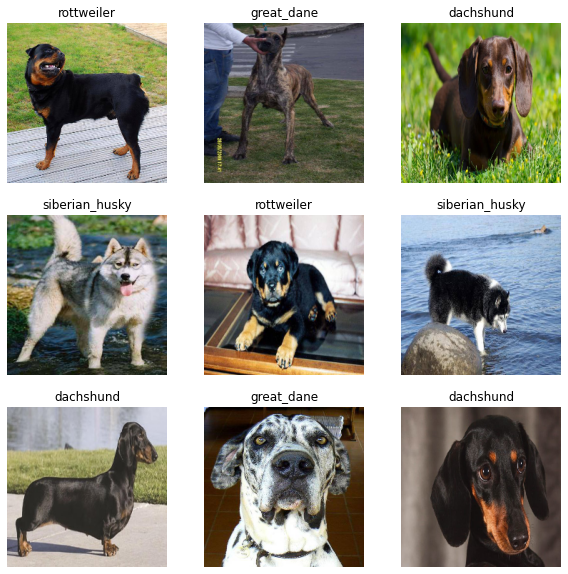

In [32]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_9_images(train_images, train_labels)

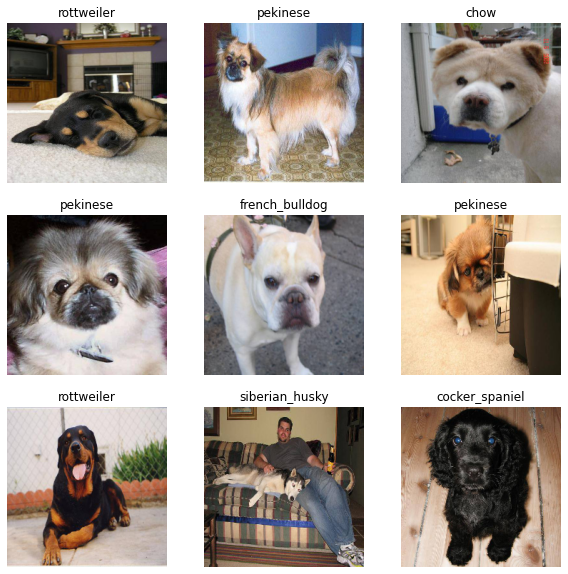

In [33]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())

show_9_images(val_images, val_labels)

In [34]:
# Setup input shape to the model
INPUT_SHAPE = [None, 224, 224, 3]  # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [35]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with:', MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation='softmax')  # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Buil the model
  model.build(INPUT_SHAPE)

  return model

In [36]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 10)                10020     
Total params: 5,442,733
Trainable params: 10,020
Non-trainable params: 5,432,713
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 620
  y sizes: 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10
Make sure all arrays contain the same number of samples.